In [1]:
import pathlib
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import PIL

from glob import glob
from IPython.display import SVG
import PIL as image_lib
from tensorflow.keras.layers import GlobalAveragePooling2D

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.preprocessing.image import load_img

In [2]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("/content/drive/MyDrive/DataSets/Color_Classify/train")
data_dir_test = pathlib.Path("/content/drive/MyDrive/DataSets/Color_Classify/test")

In [3]:
# Count the number of image in Train and Test directory
# Using the glob to retrieve files/pathnames matching a specified pattern.

#Train Image count
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

#Test Image count
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

172
18


Found 7681 files belonging to 14 classes.


IsADirectoryError: [Errno 21] Is a directory: '/content/drive/MyDrive/DataSets/Color_Classify/train/black/output'

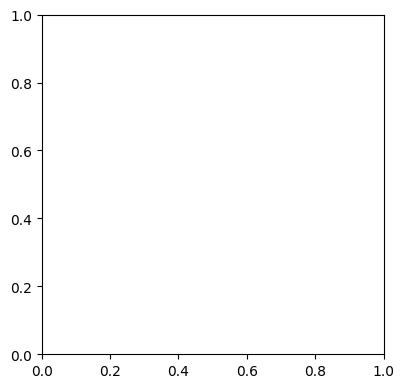

In [4]:
#Visualize one instance of all the class present in the dataset.

#image_dataset_from_directory() will return a tf.data.Dataset that yields batches of images from the subdirectories.
#label_mode is categorial, the labels are a float32 tensor of shape (batch_size, num_classes), representing a one-hot encoding of the class index.
image_dataset = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=64,image_size=(224,224),
                                                                    label_mode='categorical',seed=123)

#all the classes of plants
class_names = image_dataset.class_names

#Dictionary to store the path of image as per the class
files_path_dict = {}

for c in class_names:
    files_path_dict[c] = list(map(lambda x:str(data_dir_train)+'/'+c+'/'+x,os.listdir(str(data_dir_train)+'/'+c)))

#Visualize image
plt.figure(figsize=(15,15))
index = 0
for c in class_names:
    path_list = files_path_dict[c][:1]
    index += 1
    plt.subplot(3,3,index)
    plt.imshow(load_img(path_list[0],target_size=(224,224)))
    plt.title(c)
    plt.axis("off")

In [5]:
def class_distribution_count(directory):

    #count number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))

    #name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]

    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'No. of Image'])

df = class_distribution_count(data_dir_train)
df

,Class,No. of Image
0,white,17
1,orange,18
2,pink,8
3,yellow,18
4,red,20
5,violet,18
6,peach,13
7,olive,14
8,teal,8
9,purple,8


<Axes: xlabel='No. of Image', ylabel='Class'>

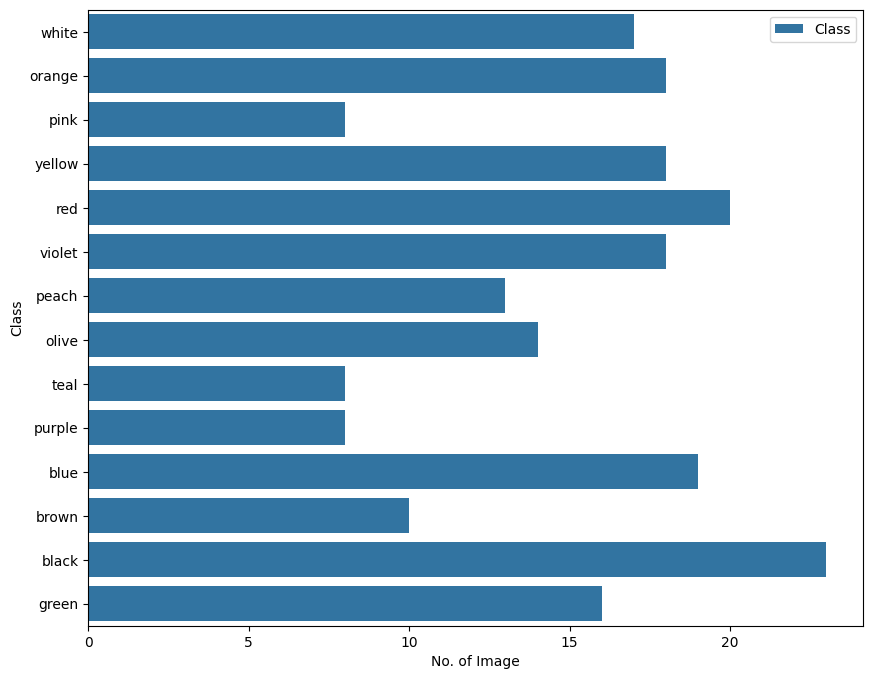

In [6]:
#Visualize the Number of image in each class.
import seaborn as sns
plt.figure(figsize=(10, 8)  )
sns.barplot(x="No. of Image", y="Class", data=df,
            label="Class")

In [ ]:
#install Augmentor
# used for generating extra artificial images copied from dataset inorder to increase data training accur.
!pip install Augmentor

In [ ]:
# Define the path to the training dataset
path_to_training_dataset = "/content/drive/MyDrive/DataSets/Color_Classify/train"

# Define the list of class names (folder names)
class_names = ["black", "blue","brown", "green","olive", "orange","peach", "pink","purple", "red","teal", "violet","white", "yellow"]

# Iterate over each class
for class_name in class_names:
    # Construct the path to the current class
    class_path = os.path.join(path_to_training_dataset, class_name)

    # Create an Augmentor pipeline for the current class
    p = Augmentor.Pipeline(class_path)

    # Add rotation augmentation with certain probabilities and limits
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)

    # Sample 1000 augmented images for each class
    p.sample(500)

Initialised with 23 image(s) found.
Output directory set to /content/drive/MyDrive/DataSets/Color_Classify/train/black/output.

Processing <PIL.Image.Image image mode=RGB size=256x256 at 0x7BBC9128C220>: 100%|██████████| 500/500 [00:10<00:00, 47.01 Samples/s]


Initialised with 19 image(s) found.
Output directory set to /content/drive/MyDrive/DataSets/Color_Classify/train/blue/output.

Processing <PIL.Image.Image image mode=RGB size=256x256 at 0x7BBC912B3580>: 100%|██████████| 500/500 [00:11<00:00, 45.04 Samples/s]


Initialised with 10 image(s) found.
Output directory set to /content/drive/MyDrive/DataSets/Color_Classify/train/brown/output.

Processing <PIL.Image.Image image mode=RGB size=256x256 at 0x7BBC8A5FF550>: 100%|██████████| 500/500 [00:11<00:00, 45.37 Samples/s]


Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/DataSets/Color_Classify/train/green/output.

Processing <PIL.Image.Image image mode=RGB size=256x256 at 0x7BBC9128FBE0>: 100%|██████████| 500/500 [00:11<00:00, 45.08 Samples/s]


Initialised with 14 image(s) found.
Output directory set to /content/drive/MyDrive/DataSets/Color_Classify/train/olive/output.

Processing <PIL.Image.Image image mode=P size=225x225 at 0x7BBC91217D00>: 100%|██████████| 500/500 [00:11<00:00, 44.32 Samples/s]


Initialised with 18 image(s) found.
Output directory set to /content/drive/MyDrive/DataSets/Color_Classify/train/orange/output.

Processing <PIL.Image.Image image mode=RGB size=256x256 at 0x7BBC996977F0>: 100%|██████████| 500/500 [00:11<00:00, 44.55 Samples/s]


Initialised with 13 image(s) found.
Output directory set to /content/drive/MyDrive/DataSets/Color_Classify/train/peach/output.

Processing <PIL.Image.Image image mode=RGB size=256x256 at 0x7BBC8A6316F0>: 100%|██████████| 500/500 [00:11<00:00, 43.42 Samples/s]


Initialised with 8 image(s) found.
Output directory set to /content/drive/MyDrive/DataSets/Color_Classify/train/pink/output.

Processing <PIL.Image.Image image mode=RGB size=256x256 at 0x7BBC91215210>: 100%|██████████| 500/500 [00:10<00:00, 46.70 Samples/s]


Initialised with 8 image(s) found.
Output directory set to /content/drive/MyDrive/DataSets/Color_Classify/train/purple/output.

Processing <PIL.Image.Image image mode=P size=225x225 at 0x7BBC9128D2A0>: 100%|██████████| 500/500 [00:08<00:00, 60.41 Samples/s]


Initialised with 20 image(s) found.
Output directory set to /content/drive/MyDrive/DataSets/Color_Classify/train/red/output.

Processing <PIL.Image.Image image mode=RGB size=256x256 at 0x7BBC8A5FF550>: 100%|██████████| 500/500 [00:11<00:00, 44.43 Samples/s]


Initialised with 8 image(s) found.
Output directory set to /content/drive/MyDrive/DataSets/Color_Classify/train/teal/output.

Processing <PIL.Image.Image image mode=RGB size=225x225 at 0x7BBC8A630AF0>: 100%|██████████| 500/500 [00:10<00:00, 46.93 Samples/s]


Initialised with 18 image(s) found.
Output directory set to /content/drive/MyDrive/DataSets/Color_Classify/train/violet/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x7BBC9128F6D0>: 100%|██████████| 500/500 [00:11<00:00, 44.84 Samples/s]


Initialised with 17 image(s) found.
Output directory set to /content/drive/MyDrive/DataSets/Color_Classify/train/white/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x7BBC91214940>: 100%|██████████| 500/500 [00:11<00:00, 45.43 Samples/s]


Initialised with 18 image(s) found.
Output directory set to /content/drive/MyDrive/DataSets/Color_Classify/train/yellow/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x7BBC912187F0>: 100%|██████████| 500/500 [00:10<00:00, 47.12 Samples/s]


In [7]:
#exceeding aug. cell
#Count total number of image generated by Augmentor.
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

5665


In [ ]:
#Pre-Processing on total directory images ...

main_dir = '/content/drive/MyDrive/DataSets/Color_Classify'

# Define constants for cropping and enhancement
crop_size = 250  # Size for cropping
saturation_factor = 2.0  # Factor to increase saturation

# Function to process images in a directory
def process_images(directory):
    # Process each file in the directory
    for root, dirs, files in os.walk(directory):
        for filename in files:
            # Read the image
            image_path = os.path.join(root, filename)
            image = cv2.imread(image_path)

            if image is None:
                print(f"Error: Unable to read image '{filename}' in directory '{root}'")
                continue

            # Get dimensions of the image
            height, width = image.shape[:2]

            # Calculate starting and ending coordinates for cropping
            x_start = (width - crop_size) // 2
            y_start = (height - crop_size) // 2

            # Check if the image is large enough for cropping
            if x_start < 0 or y_start < 0:
                print(f"Error: Image '{filename}' in directory '{root}' is too small for cropping")
                continue

            x_end = x_start + crop_size
            y_end = y_start + crop_size

            # Crop the image to 100x100 pixels
            cropped_image = image[y_start:y_end, x_start:x_end]

            # Increase saturation
            hsv_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2HSV)
            hsv_image[:, :, 1] = hsv_image[:, :, 1] * saturation_factor
            saturated_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)

            # Overwrite the original image with the enhanced one
            cv2.imwrite(image_path, saturated_image)  # Overwrite with enhanced image

# Apply image processing to train directory
process_images(os.path.join(main_dir, 'train'))

# Apply image processing to test directory
process_images(os.path.join(main_dir, 'test'))

Error: Image '5.png' in directory '/content/drive/MyDrive/DataSets/Color_Classify/train/olive' is too small for cropping
Error: Image '4.png' in directory '/content/drive/MyDrive/DataSets/Color_Classify/train/olive' is too small for cropping
Error: Image '6.png' in directory '/content/drive/MyDrive/DataSets/Color_Classify/train/olive' is too small for cropping
Error: Image '9.png' in directory '/content/drive/MyDrive/DataSets/Color_Classify/train/olive' is too small for cropping
Error: Image '8.png' in directory '/content/drive/MyDrive/DataSets/Color_Classify/train/olive' is too small for cropping
Error: Image '7.png' in directory '/content/drive/MyDrive/DataSets/Color_Classify/train/olive' is too small for cropping
Error: Image '2.png' in directory '/content/drive/MyDrive/DataSets/Color_Classify/train/olive' is too small for cropping
Error: Image '1.png' in directory '/content/drive/MyDrive/DataSets/Color_Classify/train/olive' is too small for cropping
Error: Image '11.png' in directo

In [7]:
# train dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, batch_size=64,
                                                               image_size=(224,224), label_mode='categorical',
                                                               seed=123,subset="training",
                                                               validation_split=0.2)
# validation dataset
val_ds =tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=64,
                                                            image_size=(224,224), label_mode='categorical',
                                                            seed=123,subset="validation",
                                                            validation_split=0.2)

Found 7681 files belonging to 14 classes.
Using 6145 files for training.
Found 7681 files belonging to 14 classes.
Using 1536 files for validation.


In [8]:
#tf.data.experimental.AUTOTUNE defines appropriate number of processes that are free for working.
#`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.
#`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [9]:
# Initialize the DenseNet201 Sequential model
# Load the DenseNet201 model pretrained on ImageNet without including the top classification layer
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# Freeze the layers in the base model to prevent them from being trained
for layer in base_model.layers:
    layer.trainable = False

# Create a Sequential model
densenet201_model = Sequential()

# Add the base DenseNet201 model
densenet201_model.add(base_model)

# Add a global average pooling layer to reduce the spatial dimensions of the features
densenet201_model.add(GlobalAveragePooling2D())

# Add a fully connected layer with 512 units and ReLU activation
densenet201_model.add(Dense(512, activation='relu'))

# Add the output layer with the appropriate number of units for your classification task
densenet201_model.add(Dense(14, activation='softmax'))
# Print a summary of the model architecture
densenet201_model.summary()

74836368/74836368 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 global_average_pooling2d (  (None, 1920)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 512)               983552    
                                                                 
 dense_1 (Dense)             (None, 14)                7182      
                                                                 
Total params: 19312718 (73.67 MB)
Trainable params: 990734 (3.78 MB)
Non-trainable params: 18321984 (69.89 MB)
_________________________________________________________________


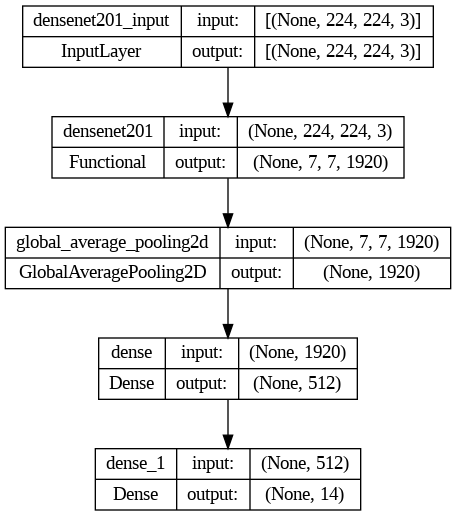

In [10]:
# vizualizing the model
plot_model(densenet201_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [11]:
#Compile the Model
#Adam optimization: is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
#categorical_crossentropy: Used as a loss function for multi-class classification model where there are two or more output labels.

densenet201_model.compile(optimizer=Adam(learning_rate=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

#ModelCheckpoint callback is used in conjunction with training using model.fit() to save a model or weights (in a checkpoint file) at some interval,
#so the model or weights can be loaded later to continue the training from the state saved.
checkpoint = ModelCheckpoint("model.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)

#Stop training when a monitored metric has stopped improving.
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)

In [13]:
# Train the model
history = densenet201_model.fit(train_ds, validation_data=val_ds, 'epochs'=10, callbacks=[checkpoint, earlystop])

Epoch 1/10
97/97 [==============================] - ETA: 0s - loss: 0.6828 - accuracy: 0.9243 
Epoch 1: val_accuracy improved from -inf to 0.99740, saving model to model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


97/97 [==============================] - 3122s 23s/step - loss: 0.6828 - accuracy: 0.9243 - val_loss: 0.0159 - val_accuracy: 0.9974
Epoch 2/10
97/97 [==============================] - ETA: 0s - loss: 0.0054 - accuracy: 0.9982 
Epoch 2: val_accuracy improved from 0.99740 to 1.00000, saving model to model.h5
97/97 [==============================] - 2034s 21s/step - loss: 0.0054 - accuracy: 0.9982 - val_loss: 7.7695e-04 - val_accuracy: 1.0000
Epoch 3/10
97/97 [==============================] - ETA: 0s - loss: 3.0307e-04 - accuracy: 1.0000 
Epoch 3: val_accuracy did not improve from 1.00000
97/97 [==============================] - 2068s 21s/step - loss: 3.0307e-04 - accuracy: 1.0000 - val_loss: 3.7180e-04 - val_accuracy: 1.0000
Epoch 4/10
97/97 [==============================] - ETA: 0s - loss: 1.6218e-04 - accuracy: 1.0000 
Epoch 4: val_accuracy did not improve from 1.00000
97/97 [==============================] - 2061s 21s/step - loss: 1.6218e-04 - accuracy: 1.0000 - val_loss: 3.5457e-04

In [31]:
# Define the function to detect dominant color
def detect_dominant_color(image_path):
    # Load the image
    image = cv2.imread(predicted_image_path)
    # Convert the image to the HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # Define the range of colors you want to detect
    lower_range = np.array([0, 100, 100])
    upper_range = np.array([10, 255, 255])
    # Create a mask to extract the color
    mask = cv2.inRange(hsv_image, lower_range, upper_range)
    # Find the dominant color
    dominant_color = cv2.mean(image, mask=mask)[:3]
    # Convert the color to RGB
    dominant_color_rgb = tuple(map(int, dominant_color[::-1]))
    return dominant_color_rgb


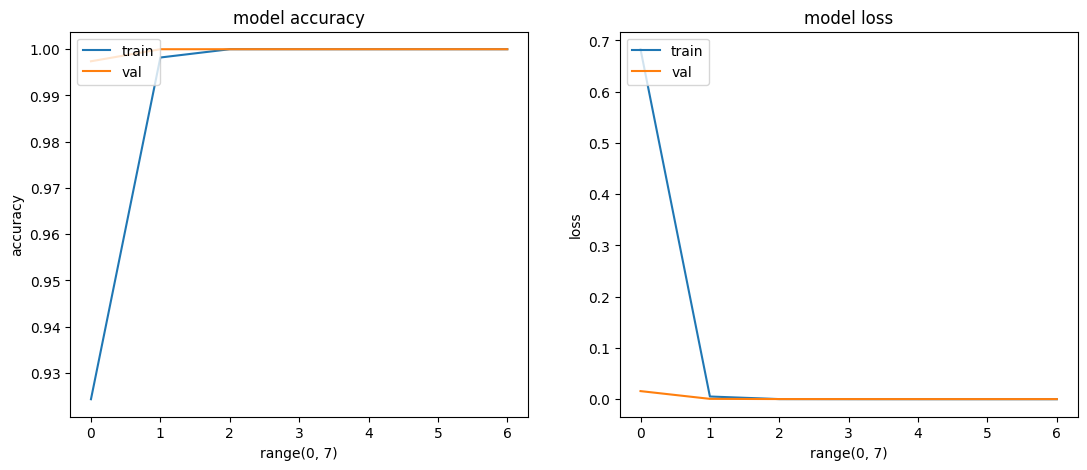

In [32]:
# Plot the training curves

epochs_range = range(earlystop.stopped_epoch+1)

plt.figure(figsize=(13,5))
plt.subplot(1, 2, 1)

#Plot Model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')

#Plot Model Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 231ms/step
Actual Class : blue

Predictive Class : blue

Dominant Color RGB: (0, 0, 0)
Dominant Color HEX: #000000


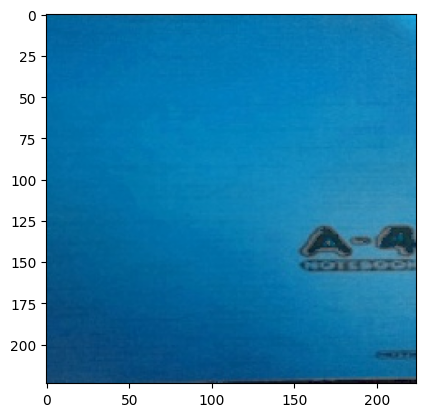

In [33]:
Test_image_path = os.path.join(data_dir_test, class_names[1], '*')
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[-1],target_size=(224,224))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = densenet201_model.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
pred_class_name = class_names[pred]

# Construct the path to the predicted class image in the test dataset
predicted_image_path = os.path.join(data_dir_test, pred_class_name, '*')

# Use glob to retrieve the path of the first image in the predicted class directory
predicted_image_paths = glob(predicted_image_path)
if predicted_image_paths:
    predicted_image_path = predicted_image_paths[0]
else:
    print("No images found for the predicted class:", pred_class_name)

# Use this path to detect the dominant color
dominant_color_rgb = detect_dominant_color(predicted_image_path)

# Define the rgb_to_hex function
def rgb_to_hex(rgb):
    """Convert RGB tuple to hexadecimal color code."""
    return '#{:02x}{:02x}{:02x}'.format(rgb[0], rgb[1], rgb[2])

# Convert the RGB value to HEX
dominant_color_hex = rgb_to_hex(dominant_color_rgb)

print("Actual Class : " + class_names[1] + '\n\n' + "Predictive Class : " + pred_class + '\n')
print("Dominant Color RGB:", dominant_color_rgb)
print("Dominant Color HEX:", dominant_color_hex)